# Pushkal Ojha
# 220968422
# Batch B2

## Importing important libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
!pip install graphviz
import graphviz
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

Defaulting to user installation because normal site-packages is not writeable


## Dataset 1

In [3]:
df1 = pd.read_csv("RF_Dataset1_heart_v2.csv")

In [4]:
df1.columns

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

In [5]:
df1_copy = df1

In [6]:
ss = StandardScaler()
cols = ['age', 'sex', 'BP', 'cholestrol']
for col in cols:
    df1_copy[col] = ss.fit_transform(df1_copy[[col]])

In [7]:
X = df1_copy.drop(columns = 'heart disease')
y = df1_copy['heart disease']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
rfc = RandomForestClassifier(random_state = 42)

In [10]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
y_pred = rfc.predict(X_test)

In [12]:
acc = accuracy_score(y_test, y_pred)
acc

0.6296296296296297

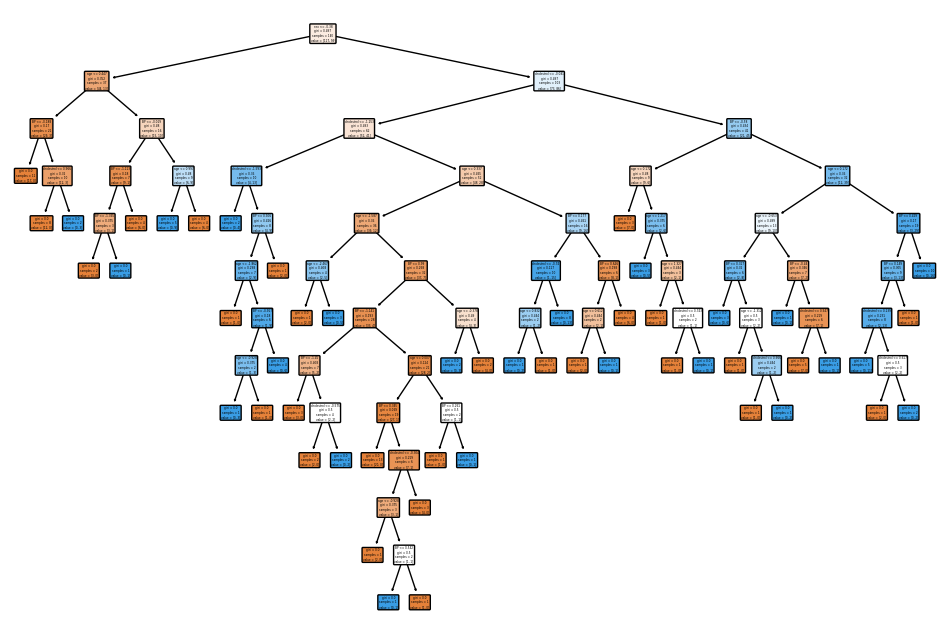

In [13]:
plt.figure(figsize=(12, 8))
plot_tree(rfc.estimators_[0], filled=True, feature_names=X.columns, rounded=True)
plt.show()

## Dataset 2

In [14]:
df2 = pd.read_csv("bands.data", delimiter=',')

In [15]:
df2

,19910108,X126,TVGUIDE,25503,YES,KEY,YES.1,BENTON,GALLATIN,UNCOATED,...,36.4,0,0.1,2.5,1,34,40,105,100,band
0,19910109,X266,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.5,0,0,2.5,0.7,34,40,105,100,noband
1,19910104,B7,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,39.8,0,0,2.8,0.9,40,40,103.87,100,noband
2,19910104,T133,MASSEY,39039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.8,0,0,2.5,1.3,40,40,108.06,100,noband
3,19910111,J34,KMART,37351,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,...,42.5,5,0,2.3,0.6,35,40,106.67,100,noband
4,19910104,T218,MASSEY,38039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,37.6,5,0,2.5,0.8,40,40,103.87,100,noband
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,19941005,aa66,kmart,85813,?,key,?,?,gallatin,super,...,?,?,?,1,1,?,40,112.5,100,band
536,19941009,j44,best,38064,?,key,?,?,gallatin,super,...,?,?,?,0,0,?,40,110,100,band
537,19941009,aa58,kmart,85814,?,key,?,?,gallatin,super,...,?,?,?,2.7,2.8,?,40,108,100,band
538,19941010,aa70,kmart,85814,?,key,?,?,gallatin,super,...,?,?,?,1.5,2.3,?,40,108,100,band


### Replacing '?' with nan values and then dropping them

In [17]:
df2 = df2.replace('?', np.nan)

In [18]:
df2 = df2.dropna()

In [19]:
df2

,19910108,X126,TVGUIDE,25503,YES,KEY,YES.1,BENTON,GALLATIN,UNCOATED,...,36.4,0,0.1,2.5,1,34,40,105,100,band
2,19910104,T133,MASSEY,39039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.8,0,0,2.5,1.3,40,40,108.06,100,noband
4,19910104,T218,MASSEY,38039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,37.6,5,0,2.5,0.8,40,40,103.87,100,noband
5,19910111,X249,ROSES,35751,NO,KEY,YES,BENTON,GALLATIN,COATED,...,37.5,6,0,2.5,0.6,30,40,106.67,100,noband
6,19910111,X788,ROSES,35751,NO,KEY,YES,BENTON,GALLATIN,COATED,...,37.5,6,0,2.5,1.1,30,40,106.67,100,noband
7,19910112,M372,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,39.8,1.5,0,3,1,40,40,103.22,100,band
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,19901211,X242,AMES,34590,NO,KEY,YES,BENTON,GALLATIN,COATED,...,41.2,8,0,3,1,33,40,106.45,100,noband
425,19901214,X108,ECKERDS,34693,NO,KEY,YES,BENTON,GALLATIN,COATED,...,37.5,1,0,2.5,1.5,30,40,106.45,100,noband
426,19901218,X80,ECKERDS,34694,NO,KEY,YES,BENTON,GALLATIN,COATED,...,39.5,4.5,0,1.9,1.3,30,40,114.28,100,noband
427,19901218,F482,DOWNS,35525,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,36.1,4,0,3,1,40,40,117.85,100,noband


In [26]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()

for i in df2:
    df2[i] = le.fit_transform(df2[i])
    ohe = OneHotEncoder(sparse = False)
    ohe_output = ohe.fit_transform(df2[[i]])
    
    df_encoded = pd.concat([df2, pd.DataFrame(ohe_output, columns = ohe.get_feature_names_out([i]))], axis = 1)
df2
    

,19910108,X126,TVGUIDE,25503,YES,KEY,YES.1,BENTON,GALLATIN,UNCOATED,...,36.4,0,0.1,2.5,1,34,40,105,100,band
2,88,117,36,138,1,0,1,0,0,1,...,55,0,0,18,16,7,4,21,0,1
4,88,119,36,134,1,0,1,0,0,1,...,47,12,0,18,8,7,4,9,0,1
5,89,166,40,71,0,0,1,0,0,0,...,46,13,0,18,5,1,4,17,0,1
6,89,210,40,71,0,0,1,0,0,0,...,46,13,0,18,13,1,4,17,0,1
7,90,91,37,143,1,0,1,0,0,1,...,65,4,0,25,11,7,4,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,80,164,1,45,0,0,1,0,0,0,...,74,14,0,25,11,3,4,14,0,1
425,82,139,18,49,0,0,1,0,0,0,...,46,3,0,18,19,1,4,14,0,1
426,84,215,18,50,0,0,1,0,0,0,...,62,11,0,10,16,1,4,27,0,1
427,84,33,15,66,1,0,1,0,0,1,...,34,10,0,25,11,7,4,30,0,1


In [27]:
X = df2.drop(columns = 'band')
y = df2['band']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [29]:
rfc = RandomForestClassifier(random_state = 42)

In [30]:
rfc.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [31]:
y_pred = rfc.predict(X_test)

### Accuracy Score

In [32]:
acc = accuracy_score(y_test, y_pred)

In [33]:
acc

0.7857142857142857

### Plotting Random Forest Classifier Tree

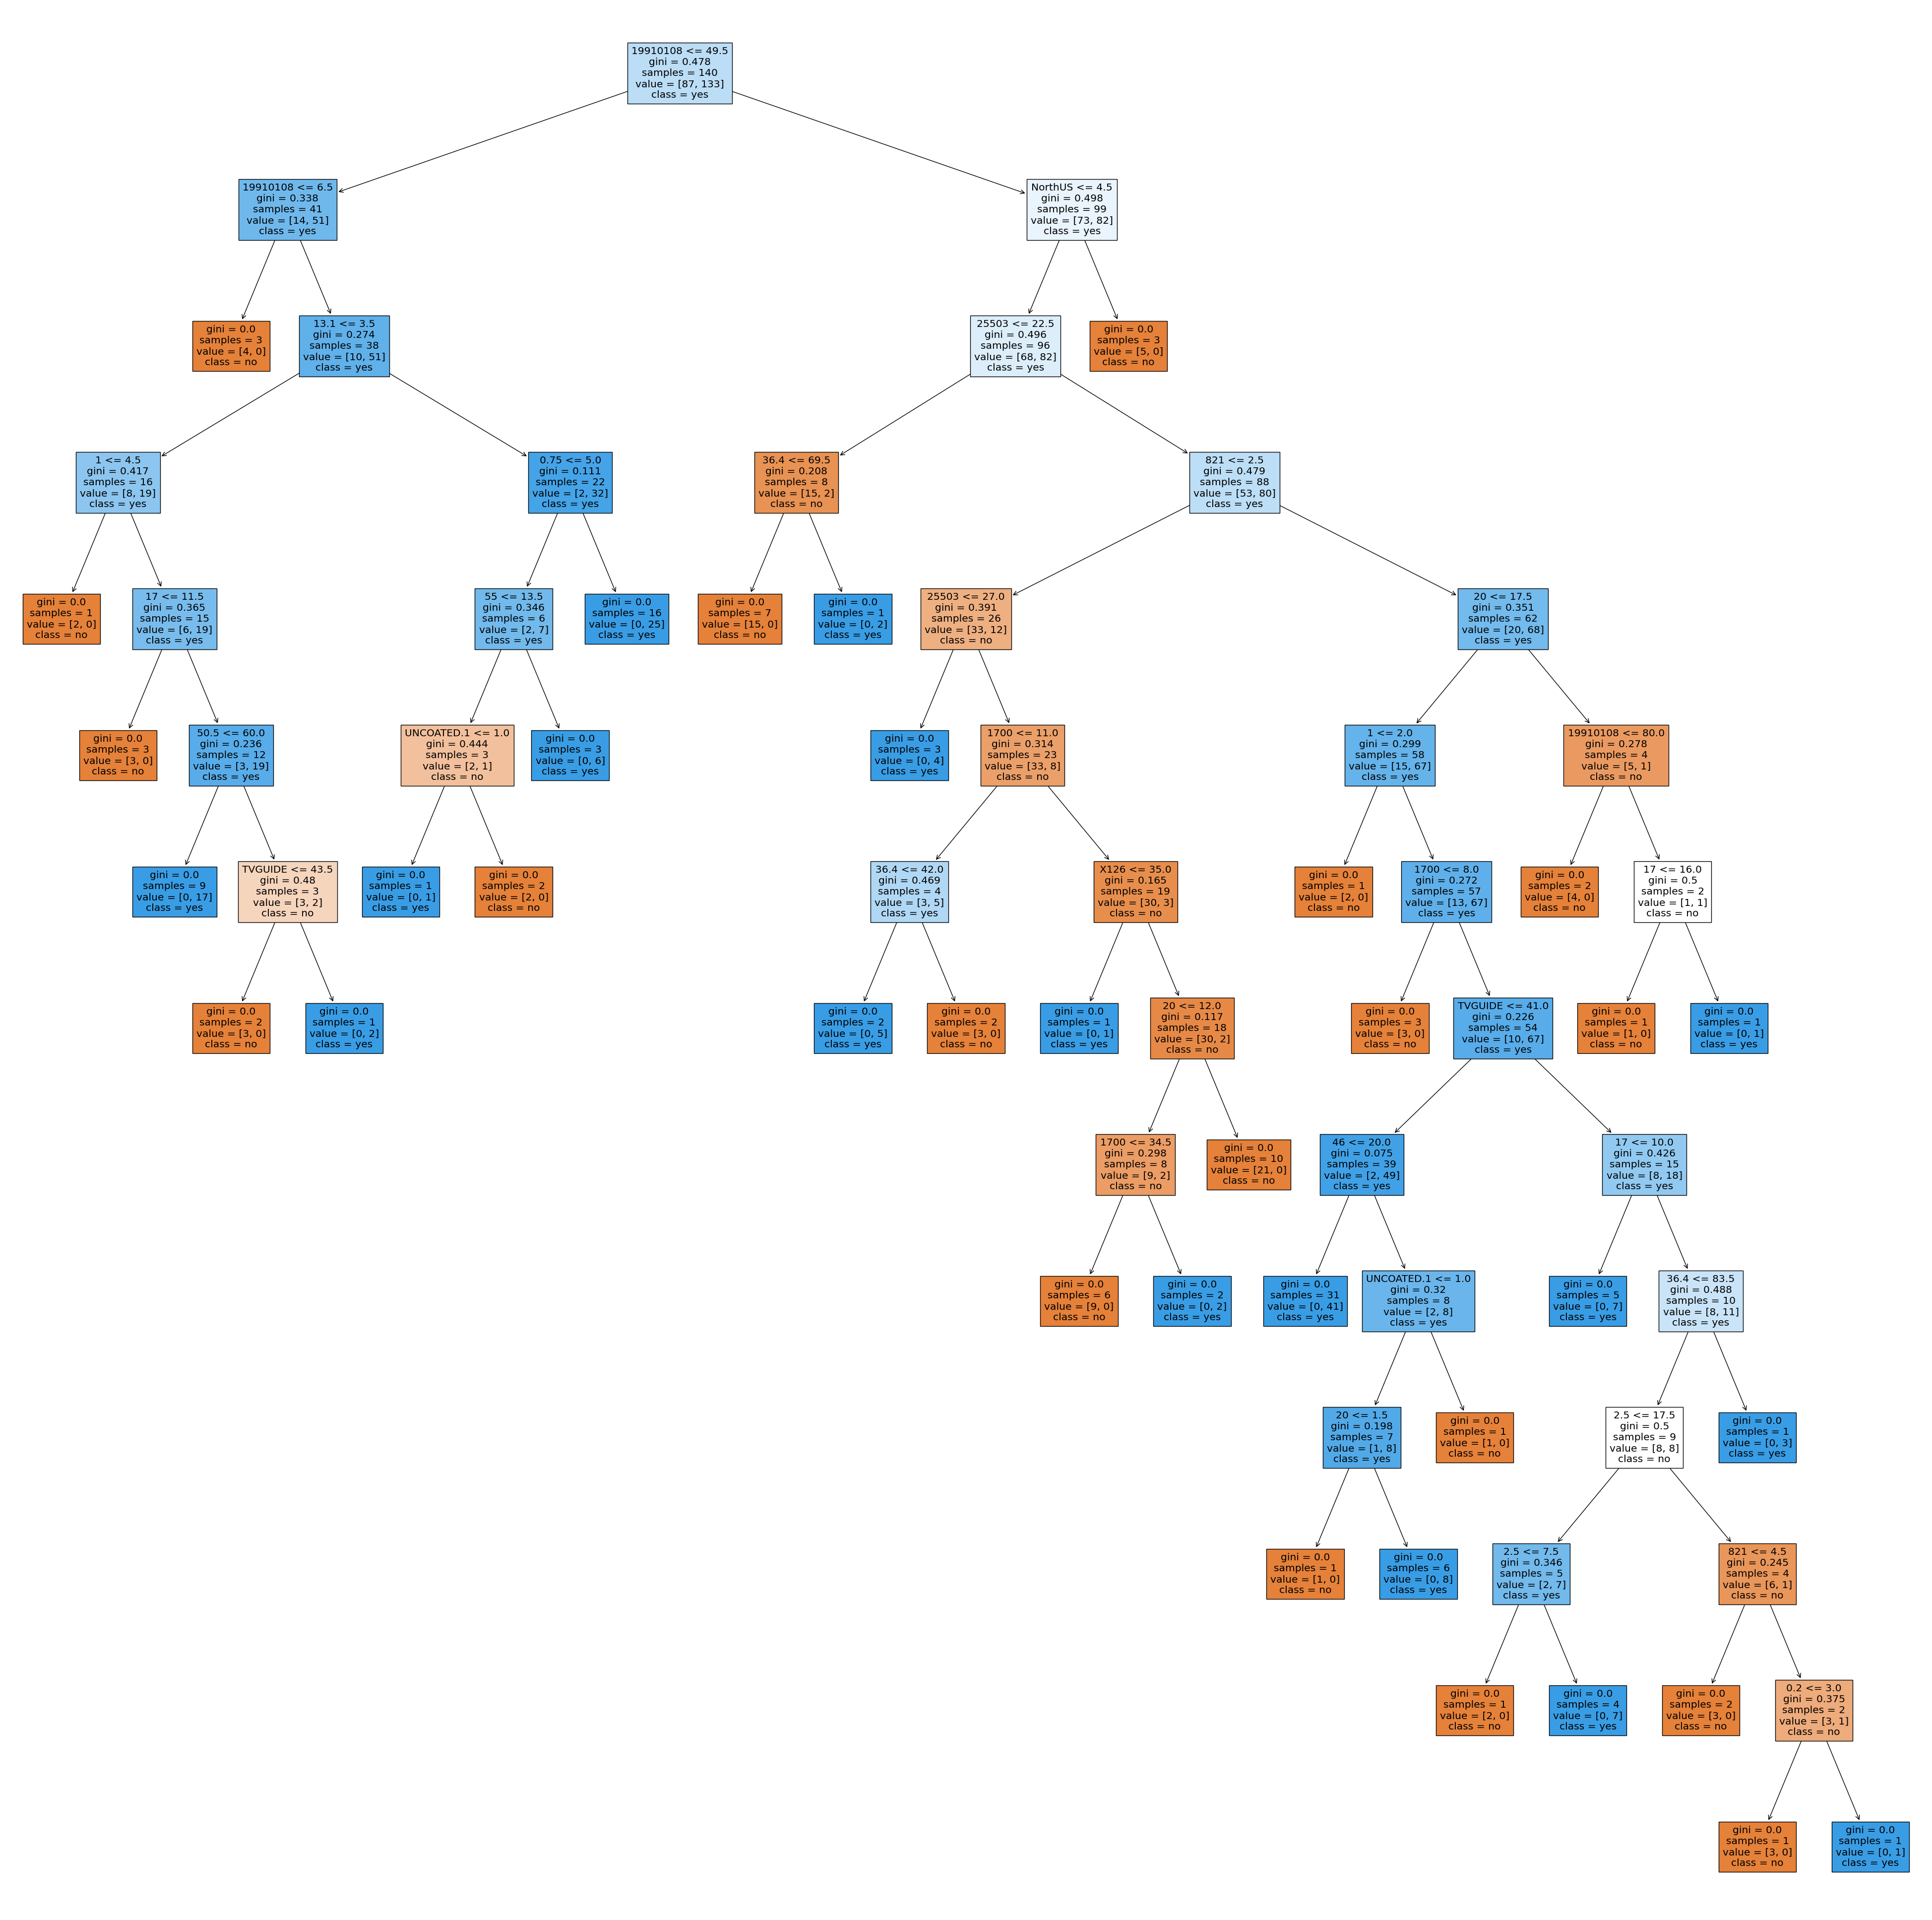

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50, 50))
from sklearn.tree import DecisionTreeClassifier, plot_tree
for i in rfc.estimators_:
    _ = plot_tree(i, feature_names=df2.columns,class_names=['no', 'yes'],filled=True)

## Dataset 3

In [46]:
df = pd.read_csv('DT_dataset1.csv')

In [47]:
df

,Day,Outlook,Temp,Humidity,Wind,Play Tennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [48]:
le = LabelEncoder()

In [51]:
df.columns

Index(['Day', 'Outlook', 'Temp', 'Humidity', 'Wind', 'Play Tennis'], dtype='object')

In [52]:
cols = ['Outlook', 'Temp', 'Humidity', 'Wind', 'Play Tennis']
for col in cols:
    df[col] = le.fit_transform(df[col])

In [53]:
df

,Day,Outlook,Temp,Humidity,Wind,Play Tennis
0,D1,2,1,0,1,0
1,D2,2,1,0,0,0
2,D3,0,1,0,1,1
3,D4,1,2,0,1,1
4,D5,1,0,1,1,1
5,D6,1,0,1,0,0
6,D7,0,0,1,0,1
7,D8,2,2,0,1,0
8,D9,2,0,1,1,1
9,D10,1,2,1,1,1


In [59]:
X = df.drop(columns = ['Day', 'Play Tennis'])
y = df['Play Tennis']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

In [61]:
rfc = RandomForestClassifier(random_state = 42)

In [62]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [63]:
y_pred = rfc.predict(X_test)

### Accuracy Score

In [65]:
acc = accuracy_score(y_test, y_pred)

In [66]:
acc

0.6666666666666666

### Classification Report

In [69]:
from sklearn.metrics import classification_report

In [70]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



### Rfc Graph

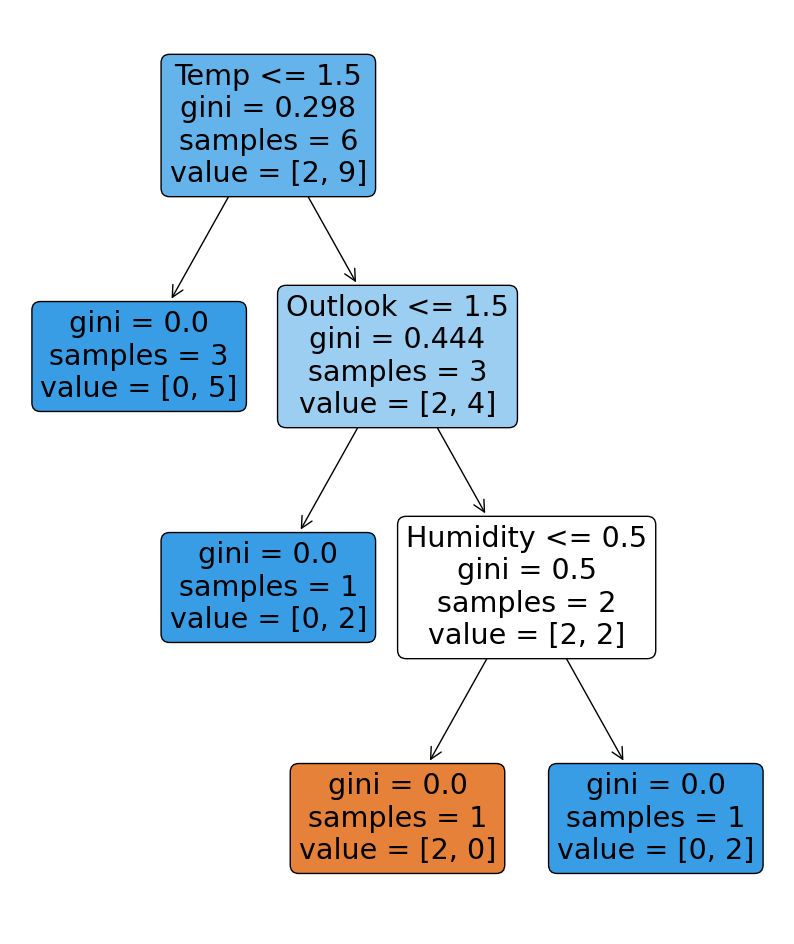

In [75]:
plt.figure(figsize = (10,12))
plot_tree(rfc.estimators_[0],filled = True, feature_names = X.columns, rounded = True)
plt.show()

## Dataset 4

In [78]:
df = pd.read_csv('DT_dataset2.csv')

In [79]:
df

,CGPA,Interactive,Practical Knowledge,Skills,Job Offer
0,>=9,Yes,Very good,Good,Yes
1,>=8,No,Good,Moderate,Yes
2,>=9,No,Average,Poor,No
3,<8,No,Average,Good,No
4,>=8,Yes,Good,Moderate,Yes
5,>=9,Yes,Good,Moderate,Yes
6,<8,Yes,Good,Poor,No
7,>=9,No,Very good,Good,Yes
8,>=8,Yes,Good,Good,Yes
9,>=8,Yes,Average,Good,Yes


In [80]:
le = LabelEncoder()

In [81]:
df.columns

Index(['CGPA', 'Interactive', 'Practical Knowledge', 'Skills', 'Job Offer'], dtype='object')

In [83]:
cols = ['Interactive', 'Practical Knowledge', 'Skills', 'Job Offer']
for col in cols:
        df[col] = le.fit_transform(df[col])
        

In [86]:
X = df.drop(columns = ['CGPA', 'Job Offer'])
y = df['Job Offer']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [88]:
rfc = RandomForestClassifier(random_state = 42)

In [89]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [90]:
y_pred = rfc.predict(X_test)

### Accuracy Score and Classification Report

In [92]:
acc = accuracy_score(y_test, y_pred)
acc

1.0

In [93]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



### RFC graph

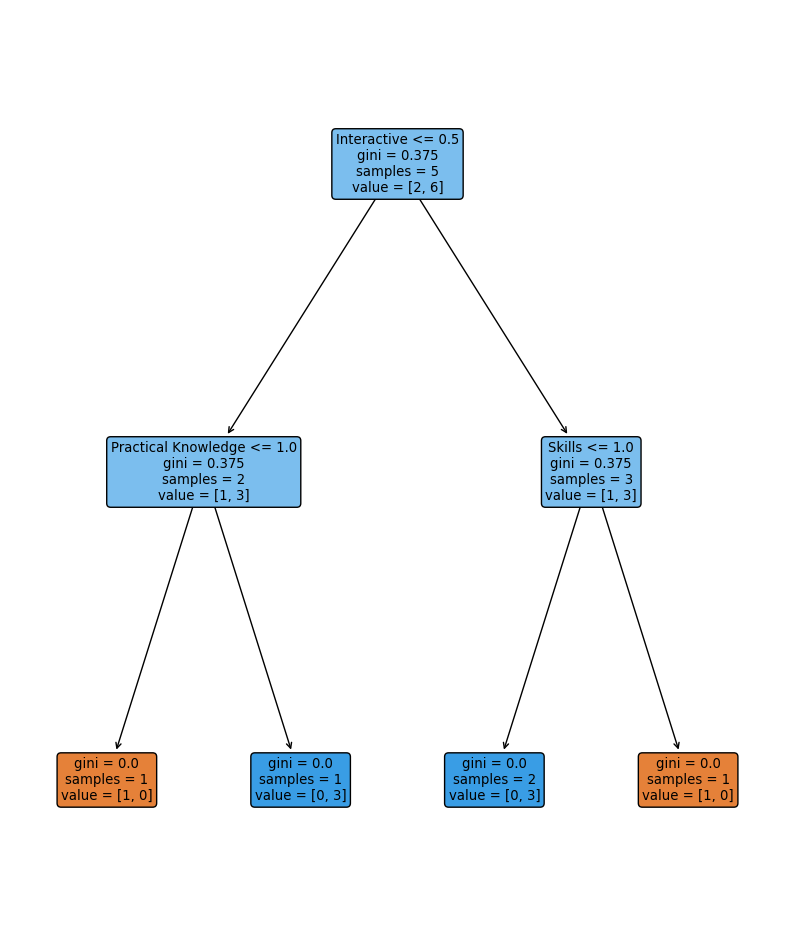

In [96]:
plt.figure(figsize = (10,12))
plot_tree(rfc.estimators_[0], filled = True, feature_names = X.columns, rounded = True)
plt.show()